In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
warnings.filterwarnings('ignore')

import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

C:\Users\Trader\anaconda3\envs\iod_dl\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex
C:\Users\Trader\AppData\Local\Temp\ipykernel_10536\2963385244.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
!pip install yahoofinancials

In [4]:
import yfinance as yf
from yahoofinancials import YahooFinancials

In [5]:
tesla = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2021-06-15', 
                      progress=False,
)
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000


In [6]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16205300
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000


In [7]:
type(tesla)

pandas.core.frame.DataFrame

In [8]:
print(tesla.info)

<bound method DataFrame.info of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2018-12-31   67.557999   67.842003   65.052002   66.559998   66.559998   
2019-01-02   61.220001   63.026001   59.759998   62.023998   62.023998   
2019-01-03   61.400002   61.880001   59.476002   60.071999   60.071999   
2019-01-04   61.200001   63.599998   60.546001   63.537998   63.537998   
2019-01-07   64.344002   67.348000   63.549999   66.991997   66.991997   
...                ...         ...         ...         ...         ...   
2021-06-08  623.010010  623.090027  595.500000  603.590027  603.590027   
2021-06-09  602.169983  611.789978  597.630005  598.780029  598.780029   
2021-06-10  603.880005  616.590027  600.500000  610.119995  610.119995   
2021-06-11  610.229980  612.559998  601.520020  609.890015  609.890015   
2021-06-14  612.229980  625.489990  609.179993  617.690002  617.690002   

     

In [9]:
tesla.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
tesla_close = tesla['Close']

In [11]:
tesla_close.head()

Date
2018-12-31    66.559998
2019-01-02    62.023998
2019-01-03    60.071999
2019-01-04    63.537998
2019-01-07    66.991997
Name: Close, dtype: float64

In [12]:
tesla_close.index

DatetimeIndex(['2018-12-31', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14',
               ...
               '2021-06-01', '2021-06-02', '2021-06-03', '2021-06-04',
               '2021-06-07', '2021-06-08', '2021-06-09', '2021-06-10',
               '2021-06-11', '2021-06-14'],
              dtype='datetime64[ns]', name='Date', length=618, freq=None)

In [13]:
tesla_close.describe().T

count    618.000000
mean     269.335323
std      259.079347
min       35.793999
25%       56.147000
50%      146.194000
75%      442.052498
max      883.090027
Name: Close, dtype: float64

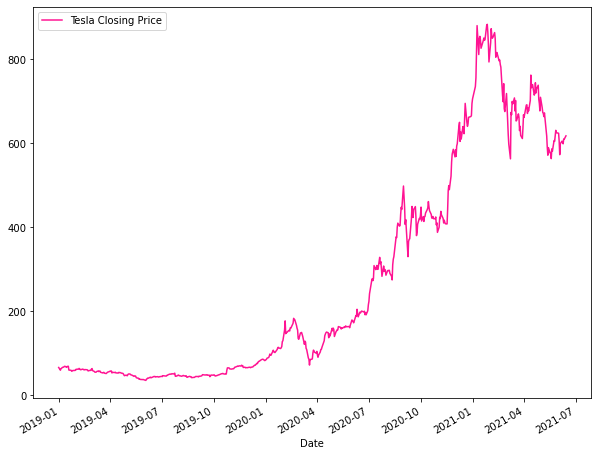

In [14]:
tesla_close.plot(figsize=(10,8),color='deeppink',label='Tesla Closing Price')
plt.legend(loc='upper left')

In [15]:
type(tesla_close)

pandas.core.series.Series

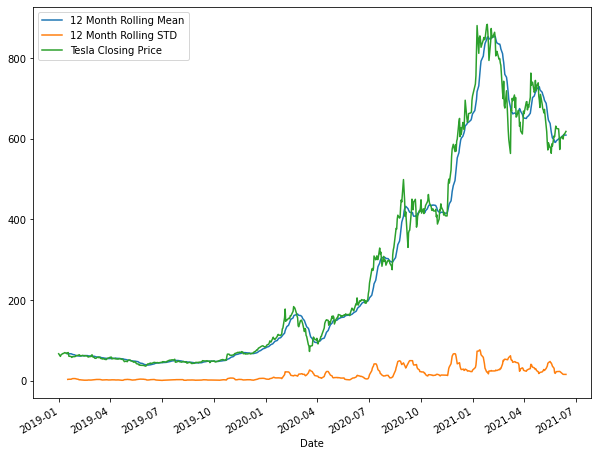

In [16]:
tesla_close.rolling(12).mean().plot(label='12 Month Rolling Mean',figsize=(10,8))
tesla_close.rolling(12).std().plot(label='12 Month Rolling STD')
tesla_close.plot(label='Tesla Closing Price')
plt.legend();

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

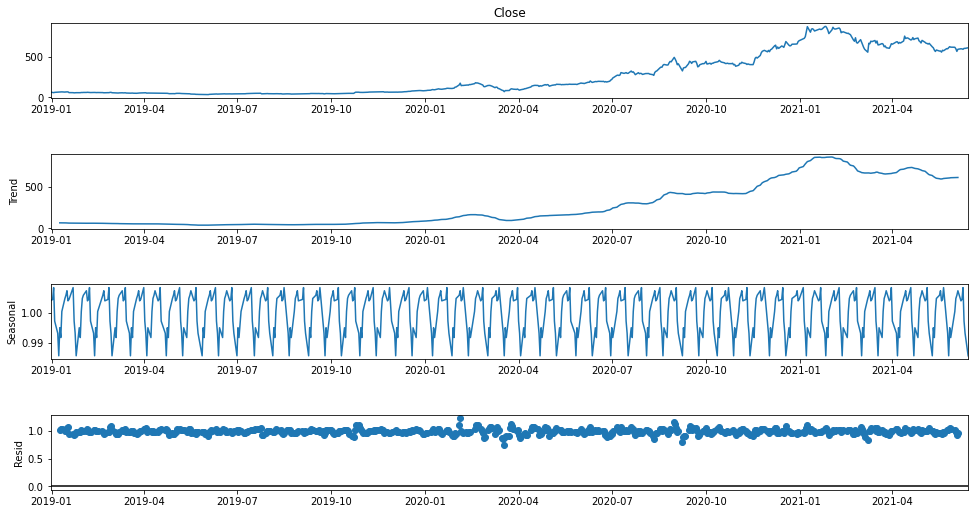

In [18]:
# decomp = seasonal_decompose(tesla_close,model = 'multiplicative',period=30)

decomp = seasonal_decompose(tesla_close,model = 'multiplicative', period=12)  
fig = plt.figure()  
fig = decomp.plot()  
fig.set_size_inches(15, 8)

### Dicky Fuller Test

In [19]:
from statsmodels.tsa.stattools import adfuller

In [20]:
result = adfuller(tesla_close)

In [21]:
result

(-0.39516921571520924,
 0.9109022262469548,
 19,
 598,
 {'1%': -3.4413325959192393,
  '5%': -2.86638530474078,
  '10%': -2.569350430308386},
 4994.534013517548)

In [22]:
def adf_check(tesla_close):
    
    result=adfuller(tesla_close)
    print(" Augmented Dicky-Fuller Test")
    labels = ['ADF Test Statistic','p-value','# of lags','Num of Obseravtions used']
    
    for value,label in zip(result,labels):
        print(label+" : "+str(value))
        
    if result[1]<=0.05:
        print("Strong evidence against null hypothesis")
        print("Reject null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis")
        print("Fail to reject null hypothesis")
        print("Data has a unit root, it is non-stationary")

In [23]:
adf_check(tesla_close)

 Augmented Dicky-Fuller Test
ADF Test Statistic : -0.39516921571520924
p-value : 0.9109022262469548
# of lags : 19
Num of Obseravtions used : 598
Weak evidence against null hypothesis
Fail to reject null hypothesis
Data has a unit root, it is non-stationary


In [24]:
tesla['First Difference'] = tesla['Close'] - tesla['Close'].shift(1)

<AxesSubplot:xlabel='Date'>

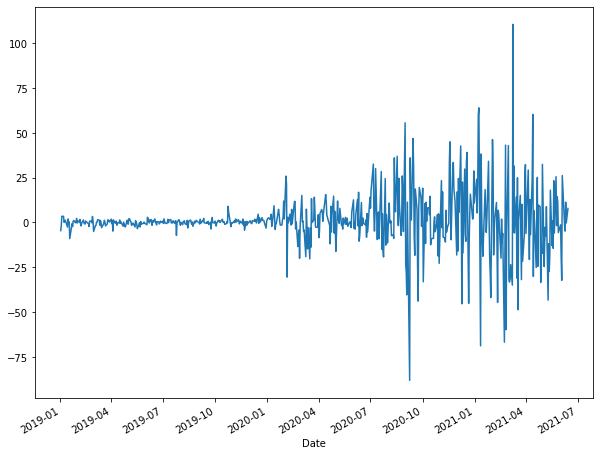

In [25]:
tesla['First Difference'].plot(figsize=(10,8))

In [26]:
adf_check(tesla['First Difference'].dropna())

 Augmented Dicky-Fuller Test
ADF Test Statistic : -5.710809075813253
p-value : 7.30717287803096e-07
# of lags : 18
Num of Obseravtions used : 598
Strong evidence against null hypothesis
Reject null hypothesis
Data has no unit root and is stationary


In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

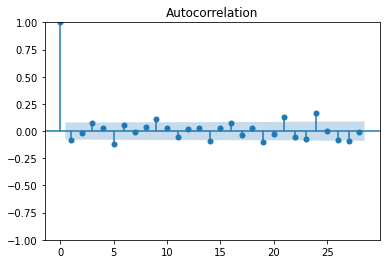

In [28]:
fig_first = plot_acf(tesla['First Difference'].dropna())

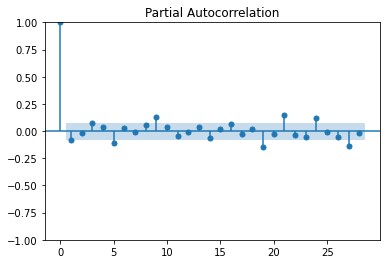

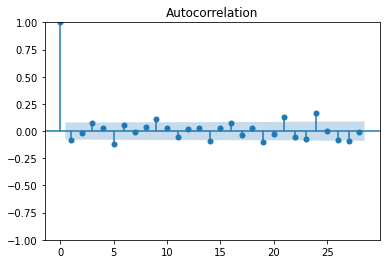

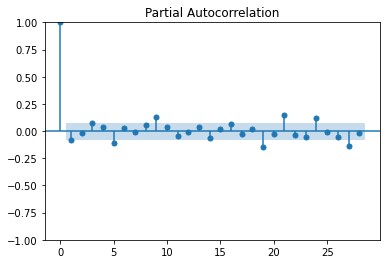

In [29]:
plot_acf(tesla['First Difference'].dropna())
plot_pacf(tesla['First Difference'].dropna())

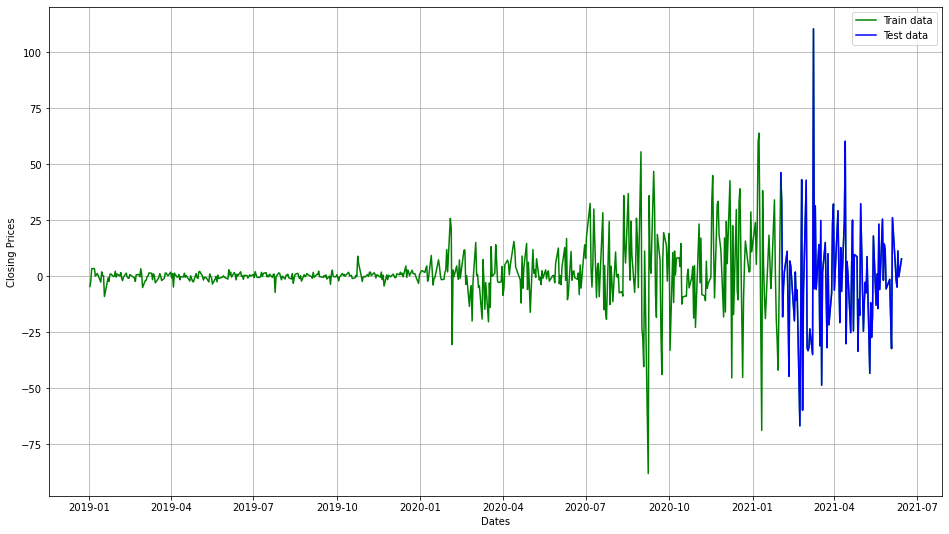

In [30]:
train_data, test_data = tesla['First Difference'][3:int(len(tesla['First Difference'])*0.85)], tesla['First Difference'][int(len(tesla['First Difference'])*0.85):]
plt.figure(figsize=(16,9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(tesla['First Difference'], 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()
plt.show()

In [31]:
from pmdarima.arima import auto_arima

In [32]:
from statsmodels.tsa.arima_model import ARIMA

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4149.528, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4151.455, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4151.458, Time=0.08 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4153.436, Time=0.15 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4145.255, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4146.933, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4146.939, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4148.928, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.764 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  522
Model:                        SARIMAX   Log Likelihood               -2070.627
Date:                Fri, 08 Apr 2022   AIC                           4145.255
Time:                        09:44:1

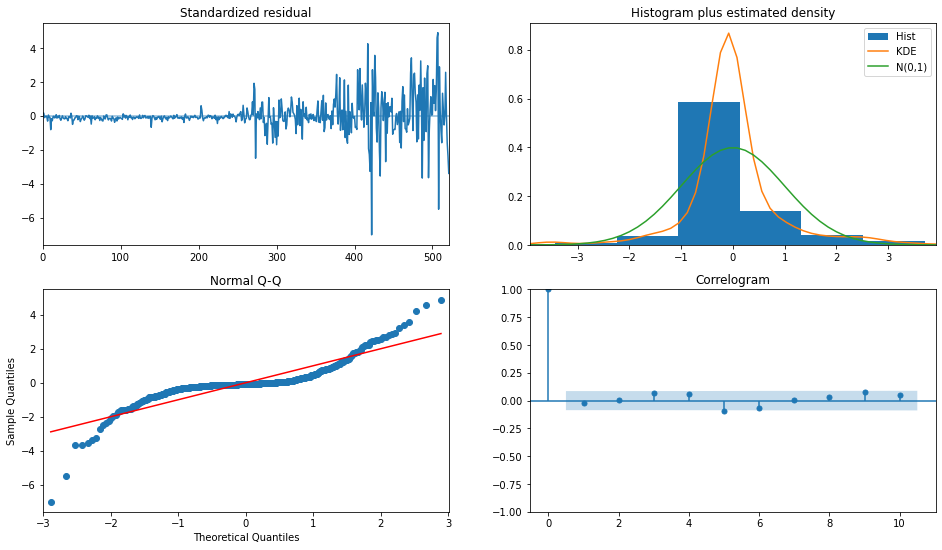

In [33]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(16,9))
plt.show()

In [40]:
from statsmodels.tsa.arima.model import ARIMA

In [42]:
#Modeling
# Build Model
model = ARIMA(train_data, order=(0, 0, 0))  
results = model.fit()  
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:       First Difference   No. Observations:                  522
Model:                          ARIMA   Log Likelihood               -2070.627
Date:                Fri, 08 Apr 2022   AIC                           4145.255
Time:                        09:48:02   BIC                           4153.770
Sample:                             0   HQIC                          4148.590
                                - 522                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4051      0.560      2.507      0.012       0.307       2.504
sigma2       163.2844      4.087     39.949      0.000     155.273     171.296
Ljung-Box (L1) (Q):                   0.32   Jarque-

In [43]:
results.resid

Date
2019-01-04     2.060913
2019-01-07     2.048912
2019-01-08    -1.327084
2019-01-09    -0.769085
2019-01-10    -0.117085
                ...    
2021-01-25    32.754886
2021-01-26     0.884952
2021-01-27   -20.335141
2021-01-28   -30.135067
2021-01-29   -43.305050
Length: 522, dtype: float64

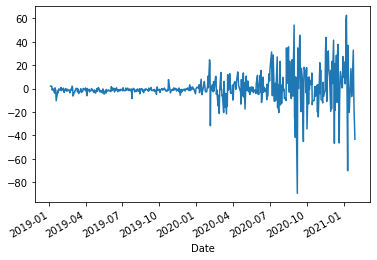

In [44]:
results.resid.plot();

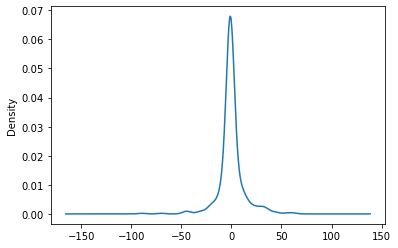

In [45]:
results.resid.plot(kind='kde');

<AxesSubplot:xlabel='Date'>

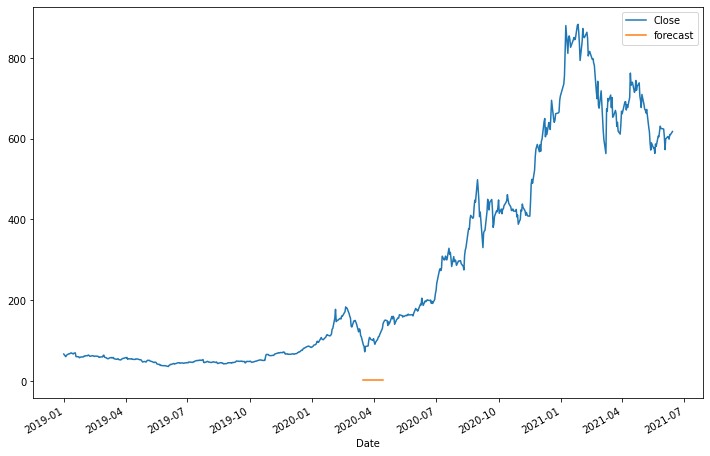

In [46]:
tesla['forecast'] = results.predict(start=300,end=320)
tesla[['Close','forecast']].plot(figsize=(12,8))

In [47]:
tesla.tail()

,Open,High,Low,Close,Adj Close,Volume,First Difference,forecast
Date,,,,,,,,
2021-06-08,623.010010,623.090027,595.500000,603.590027,603.590027,26053400,-1.539978,NaN
2021-06-09,602.169983,611.789978,597.630005,598.780029,598.780029,16584600,-4.809998,NaN
2021-06-10,603.880005,616.590027,600.500000,610.119995,610.119995,23919600,11.339966,NaN
2021-06-11,610.229980,612.559998,601.520020,609.890015,609.890015,16205300,-0.229980,NaN
2021-06-14,612.229980,625.489990,609.179993,617.690002,617.690002,20424000,7.799988,NaN
